## DSC650-T301 Big Data (2235-1)
## 5/16/2023
## Joshua Greenert

## 10.1.a

In [1]:
# Create a tokenize function that splits a sentence into words. Ensure that your tokenizer removes basic punctuation.
import string

testString = "the ! fat cat sat on the stoop, and then went up."

def tokenize(sentence):
    sentence = sentence.translate(str.maketrans('', '', string.punctuation))
    tokens = sentence.split()
    
    return tokens

In [2]:
tokenize(testString)

['the', 'fat', 'cat', 'sat', 'on', 'the', 'stoop', 'and', 'then', 'went', 'up']

## 10.1.b

In [3]:
# Implement an `ngram` function that splits tokens into N-grams. 
def ngram(tokens, n):
    ngrams = []
    # Create n-grams using a sliding window approach
    for i in range(len(tokens) - n + 1):
        ngram = tokens[i:i+n]
        ngrams.append(ngram)
    return ngrams

## 10.1.c

In [4]:
# Implement an one_hot_encode function to create a vector from a numerical vector from a list of tokens.
def one_hot_encode(tokens, num_words):
    token_index = {}
    results = []
    
    # Assign unique index to each unique token
    for token in tokens:
        if token not in token_index:
            token_index[token] = len(token_index) + 1
    
    # Create the one-hot encoded vector
    for token in tokens:
        if token in token_index:
            encoding = [0] * num_words
            token_idx = token_index[token]
            if token_idx <= num_words:
                encoding[token_idx - 1] = 1
            results.append(encoding)
    
    return results

## 10.2

In [5]:
# Using listings 6.16, 6.17, and 6.18 in Deep Learning with Python as a guide, 
# train a sequential model with embeddings on the IMDB data found in data/external/imdb/. 
# Produce the model performance metrics and training and validation accuracy curves within the Jupyter notebook
import os
import pandas as pd

folder_path_pos = '../../../data/external/imdb/aclImdb/train/pos'
folder_path_neg = '../../../data/external/imdb/aclImdb/train/neg'

# Create an empty list to store the dataset
dataset = []
labels = []

# Iterate through the positive files
for filename in os.listdir(folder_path_pos):
    if filename.endswith(".txt"):
        file_path = os.path.join(folder_path_pos, filename)
        with open(file_path, 'r', encoding='utf-8') as file:
            content = file.read()
            dataset.append(content)
            labels.append(1) 

# Iterate through the negative files
for filename in os.listdir(folder_path_neg):
    if filename.endswith(".txt"):
        file_path = os.path.join(folder_path_neg, filename)
        with open(file_path, 'r', encoding='utf-8') as file:
            content = file.read()
            dataset.append(content)
            labels.append(0)
            
# Create a DataFrame from the dataset
df_train = pd.DataFrame({'Text': dataset, 'Label': labels})

df_train.head(5)

,Text,Label
0,Bromwell High is a cartoon comedy. It ran at t...,1
1,Homelessness (or Houselessness as George Carli...,1
2,Brilliant over-acting by Lesley Ann Warren. Be...,1
3,This is easily the most underrated film inn th...,1
4,This is not the typical Mel Brooks film. It wa...,1


In [6]:
# Perform the same operation with the test data
folder_path_pos = '../../../data/external/imdb/aclImdb/test/pos'
folder_path_neg = '../../../data/external/imdb/aclImdb/test/neg'

# Create an empty list to store the dataset
dataset = []
labels = []

# Iterate through the positive files
for filename in os.listdir(folder_path_pos):
    if filename.endswith(".txt"):
        file_path = os.path.join(folder_path_pos, filename)
        with open(file_path, 'r', encoding='utf-8') as file:
            content = file.read()
            dataset.append(content)
            labels.append(1) 

# Iterate through the negative files
for filename in os.listdir(folder_path_neg):
    if filename.endswith(".txt"):
        file_path = os.path.join(folder_path_neg, filename)
        with open(file_path, 'r', encoding='utf-8') as file:
            content = file.read()
            dataset.append(content)
            labels.append(0)
            
# Create a DataFrame from the dataset
df_test = pd.DataFrame({'Text': dataset, 'Label': labels})

df_test.head(5)

,Text,Label
0,I went and saw this movie last night after bei...,1
1,Actor turned director Bill Paxton follows up h...,1
2,As a recreational golfer with some knowledge o...,1
3,"I saw this film in a sneak preview, and it is ...",1
4,Bill Paxton has taken the true story of the 19...,1


In [7]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train['Text'])
sequences = tokenizer.texts_to_sequences(df_train['Text'])

# Pad sequences to ensure consistent length
max_seq_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_seq_length)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    padded_sequences, df_train['Label'], test_size=0.2, random_state=42
)

# Create the sequential model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=32, input_length=max_seq_length))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

Epoch 1/10
625/625 [==============================] - 21s 33ms/step - loss: 0.4121 - accuracy: 0.7982 - val_loss: 0.2977 - val_accuracy: 0.8718
Epoch 2/10
625/625 [==============================] - 20s 33ms/step - loss: 0.1058 - accuracy: 0.9647 - val_loss: 0.3242 - val_accuracy: 0.8750
Epoch 3/10
625/625 [==============================] - 20s 33ms/step - loss: 0.0151 - accuracy: 0.9980 - val_loss: 0.3158 - val_accuracy: 0.8906
Epoch 4/10
625/625 [==============================] - 20s 33ms/step - loss: 0.0025 - accuracy: 0.9999 - val_loss: 0.3362 - val_accuracy: 0.8928
Epoch 5/10
625/625 [==============================] - 20s 33ms/step - loss: 8.8521e-04 - accuracy: 1.0000 - val_loss: 0.3603 - val_accuracy: 0.8944
Epoch 6/10
625/625 [==============================] - 20s 32ms/step - loss: 4.3459e-04 - accuracy: 1.0000 - val_loss: 0.3790 - val_accuracy: 0.8934
Epoch 7/10
625/625 [==============================] - 20s 32ms/step - loss: 2.4228e-04 - accuracy: 1.0000 - val_loss: 0.3978 - v

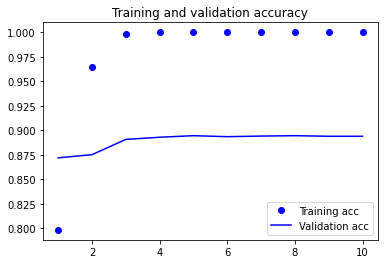

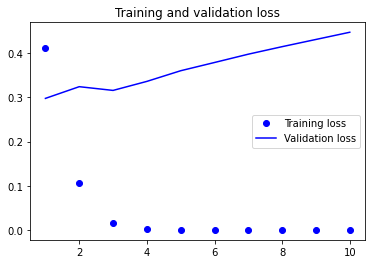

In [13]:
import matplotlib.pyplot as plt

# Creating training and validation loss and accuracy curves
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## 10.3

In [18]:
# Using listing 6.27 in Deep Learning with Python as a guide, fit the same data with an LSTM layer. 
# Produce the model performance metrics and training and validation accuracy curves within the Jupyter notebook.
from tensorflow.keras.layers import LSTM

# Create the sequential model with LSTM
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=32, input_length=max_seq_length))
model.add(LSTM(16)) 
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

Epoch 1/10
625/625 [==============================] - 505s 805ms/step - loss: 0.4635 - accuracy: 0.7819 - val_loss: 0.3322 - val_accuracy: 0.8616
Epoch 2/10
625/625 [==============================] - 493s 788ms/step - loss: 0.2023 - accuracy: 0.9259 - val_loss: 0.3221 - val_accuracy: 0.8686
Epoch 3/10
625/625 [==============================] - 492s 788ms/step - loss: 0.0972 - accuracy: 0.9686 - val_loss: 0.3647 - val_accuracy: 0.8672
Epoch 4/10
625/625 [==============================] - 491s 785ms/step - loss: 0.0556 - accuracy: 0.9831 - val_loss: 0.6348 - val_accuracy: 0.7418
Epoch 5/10
625/625 [==============================] - 489s 782ms/step - loss: 0.0715 - accuracy: 0.9747 - val_loss: 0.5099 - val_accuracy: 0.8684
Epoch 6/10
625/625 [==============================] - 491s 785ms/step - loss: 0.0321 - accuracy: 0.9908 - val_loss: 0.4638 - val_accuracy: 0.8560
Epoch 7/10
625/625 [==============================] - 487s 779ms/step - loss: 0.0164 - accuracy: 0.9960 - val_loss: 0.5852 -

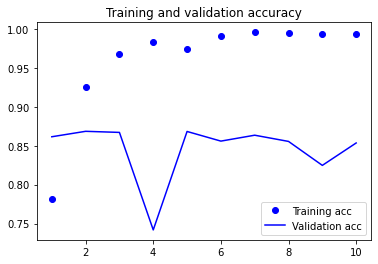

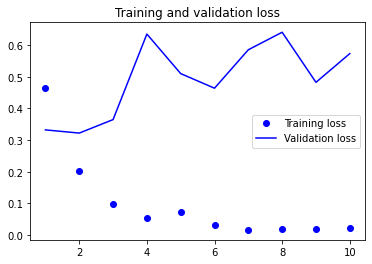

In [20]:
# Creating training and validation loss and accuracy curves
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## 10.4

In [21]:
# Using listing 6.46 in Deep Learning with Python as a guide, fit the same data with a simple 1D convnet. 
# Produce the model performance metrics and training and validation accuracy curves within the Jupyter notebook.
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D

# Create the sequential model with 1D ConvNet
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=32, input_length=max_seq_length))
model.add(Conv1D(16, kernel_size=3, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

Epoch 1/10
625/625 [==============================] - 32s 51ms/step - loss: 0.5287 - accuracy: 0.7459 - val_loss: 0.3836 - val_accuracy: 0.8274
Epoch 2/10
625/625 [==============================] - 30s 48ms/step - loss: 0.3138 - accuracy: 0.8706 - val_loss: 0.3161 - val_accuracy: 0.8610
Epoch 3/10
625/625 [==============================] - 30s 48ms/step - loss: 0.2044 - accuracy: 0.9251 - val_loss: 0.2976 - val_accuracy: 0.8774
Epoch 4/10
625/625 [==============================] - 30s 48ms/step - loss: 0.1197 - accuracy: 0.9653 - val_loss: 0.3000 - val_accuracy: 0.8734
Epoch 5/10
625/625 [==============================] - 30s 48ms/step - loss: 0.0660 - accuracy: 0.9845 - val_loss: 0.3237 - val_accuracy: 0.8690
Epoch 6/10
625/625 [==============================] - 31s 49ms/step - loss: 0.0346 - accuracy: 0.9939 - val_loss: 0.3429 - val_accuracy: 0.8696
Epoch 7/10
625/625 [==============================] - 30s 49ms/step - loss: 0.0182 - accuracy: 0.9980 - val_loss: 0.3649 - val_accuracy:

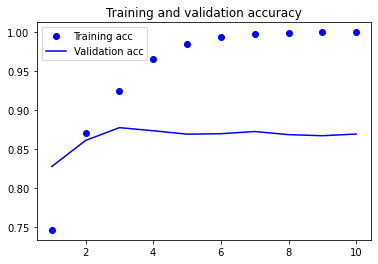

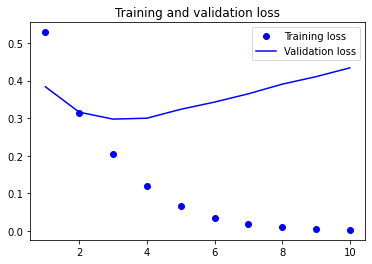

In [22]:
# Creating training and validation loss and accuracy curves
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()